# **Actividad semana 9 - RETO: Entrega 2 --> Aguas Superficiales**
# **Ciencia y analítica de datos**

## **Nombre del profesor:** Maria de la Paz Rico Fernandez

## **Nombre:** Yeison Fernando Villamil Franco, Diego Alberto Olarte Mira
## **Matrícula:** A01793803, A01794028
## **Fecha:** 18 de Noviembre/2022

---

# Librerías y cargue de datos

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, classification_report
pd.set_option('display.max_columns', 500)

In [2]:
df_superficiales = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-grupo26/main/Reto/data/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv", encoding="latin-1" )

In [3]:
#Eliminar registros vacios que vienen al final del dataset
df_superficiales = df_superficiales.dropna(how="all")
df_superficiales.dropna(axis=1 , how="all", inplace=True)
df_superficiales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [4]:
df_superficiales.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


Como fue mencionado en la entrega 1, los valores NAN o ND de las pruebas básicamente corresponden a aquella que no fueron realizadas. Si se quisiera imputar valores, estos podrían afectar la evaluación de la variable `SEMAFORO`. Por ende, para estos valores nulos se decir poner una valor de `N/A` ya que corresponden a que no fue realizada. Para los valores numéricos como mediciones, se realizará el mismo procedimiento ya que esta está categorizada como `string` y no afectará la evaluación. 

In [5]:
df_superficiales = df_superficiales.replace(np.nan, 'N/A')

Para los datos que se van a considerar para el modelamiento es importante mencionar cuale son aquellos que posiblemente pueden sobreentrenar el modelo ya que pueden ser únicos para cada observación. Estas variables son las siguientes:

* CLAVE: Son `ID` únicos por lo cual no será usado
* SITIO: Lugares donde fueron realizados las pruebas de calidad
* MUNICIPIO: Ciudad donde fue tomada la muestra para la prueba de calidad
* ESTADO: Estado donde fue tomada la muestra para la prueba de calidad
* PERIODO: Es un valor único `2020`
* LATITUD y LONGITUD: Valores únicos de localización geoespacial, por esto será realizadas pruebas para ver su comportamiento.

Adicional a estas variables, es importante considerar que para cada categorización de calidad hay una medición, en función de esta se da el valor. Así que para reducir variables, todas las de medición serán descartadas y solo se tendrán en cuenta todas aquellas que sean una variable de `CALIDAD`

Para terminar esta verificación sera realiza una matriz de correlación:

In [7]:
df_drop = df_superficiales.drop(columns=['CLAVE', 'SITIO', 'MUNICIPIO', 'PERIODO', 'LATITUD', 'LONGITUD', 'SEMAFORO', 'CUENCA', 'CUERPO DE AGUA'])
measures_var = ['DQO_mg/L', 'SST_mg/L', 'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL', 'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_UT',
                'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT']
df_drop = df_drop.drop(columns=measures_var)

In [9]:
scal = MinMaxScaler(feature_range=(1,2))
df_enc = OrdinalEncoder().fit_transform(df_drop)
df_scal = scal.fit_transform(df_enc)
df_scal_pd = pd.DataFrame(df_scal, columns=df_drop.columns)
df_corr = df_scal_pd.corr()

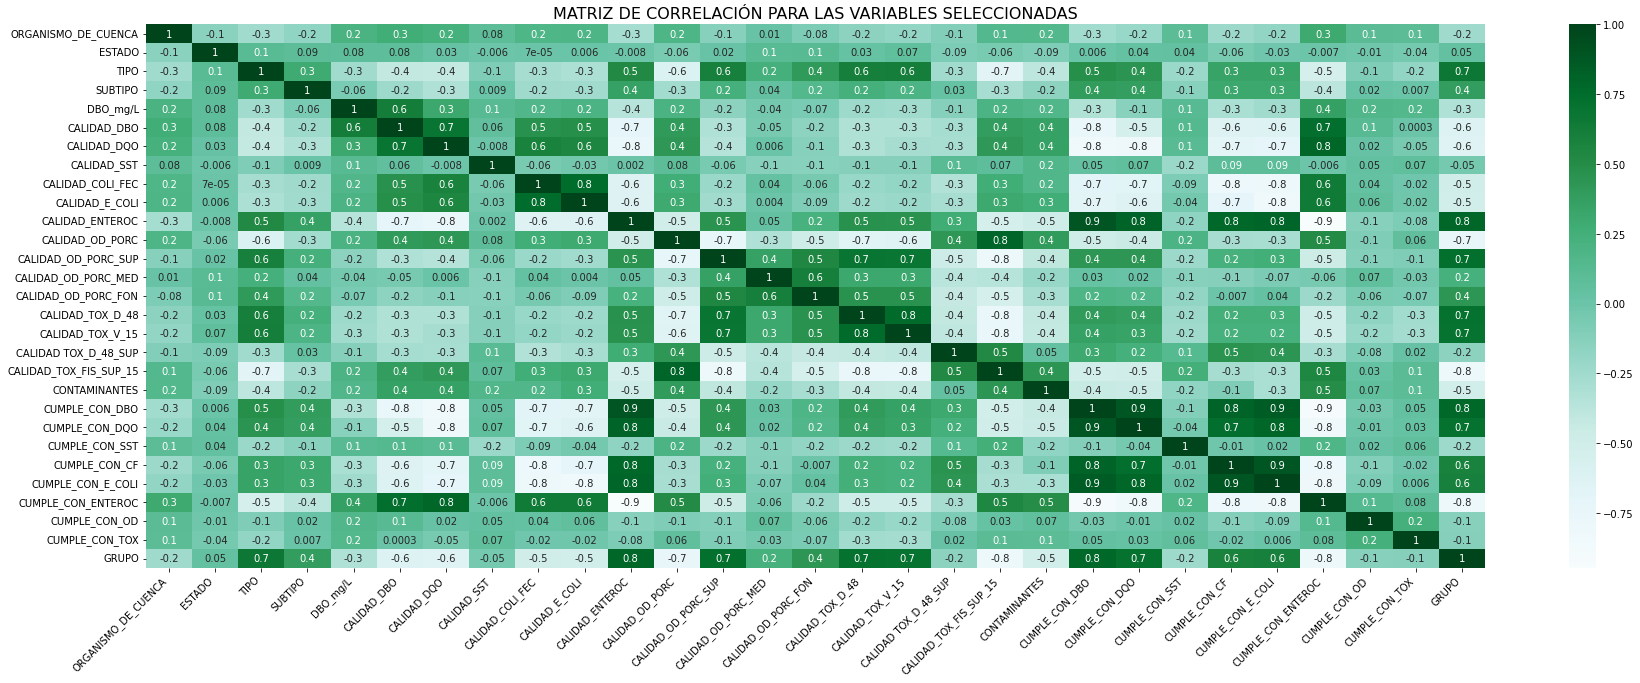

In [10]:
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df_corr, annot=True, cmap='BuGn', fmt='.1g', ax=ax)
plt.xticks(rotation=45, ha='right')
plt.title('MATRIZ DE CORRELACIÓN PARA LAS VARIABLES SELECCIONADAS', fontsize=16)
plt.show()

Es posible ver en la matriz de correlación que hay variables que se puede explicar por otras, vamos a tomar una muestra para verificar esta hipótesis. La muestra está representada por las variables `CALIDAD_DBO` y `CUMPLE_CON_DBO`.

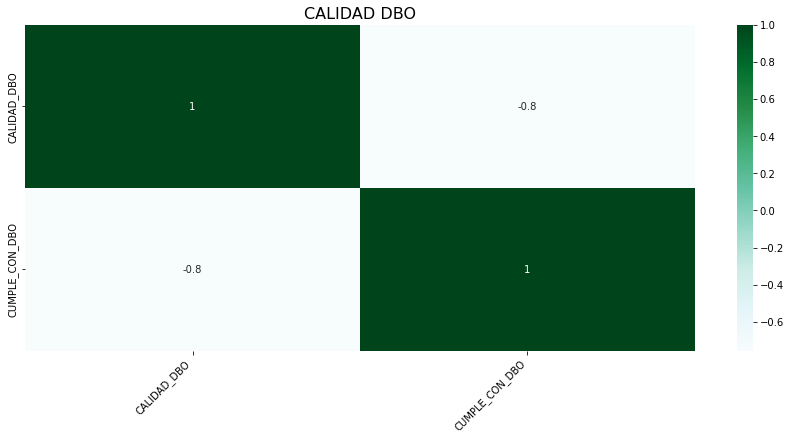

In [11]:
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(df_scal_pd[['CALIDAD_DBO', 'CUMPLE_CON_DBO']].corr(), annot=True, cmap='BuGn', fmt='.1g', ax=ax)
plt.xticks(rotation=45, ha='right')
plt.title('CALIDAD DBO', fontsize=16)
plt.show()

Verificamos que existe una cierta relación entre variables. Así que se realizarán dos iteraciones:

1. Usaremos las variables obtenidas a partir del `feature_importance` obtenido con `LogisticRegression`
2. Uso de todas las variables puras (transformadas) para ver su comportamiento

In [12]:
y = LabelEncoder().fit_transform(df_superficiales['SEMAFORO'])
X = pd.DataFrame(df_enc, columns=df_drop.columns)

In [13]:
df_superficiales['SEMAFORO']

0           Rojo
1          Verde
2          Verde
3          Verde
4          Verde
          ...   
3488    Amarillo
3489        Rojo
3490        Rojo
3491    Amarillo
3492    Amarillo
Name: SEMAFORO, Length: 3493, dtype: object

In [14]:
y

array([1, 2, 2, ..., 1, 0, 0])

# **EXPERIMENTACION**

# **Feature importance con Regresión logística**

In [15]:
X_scal = MinMaxScaler().fit_transform(X)
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_scal, y)

LogisticRegression(max_iter=10000)

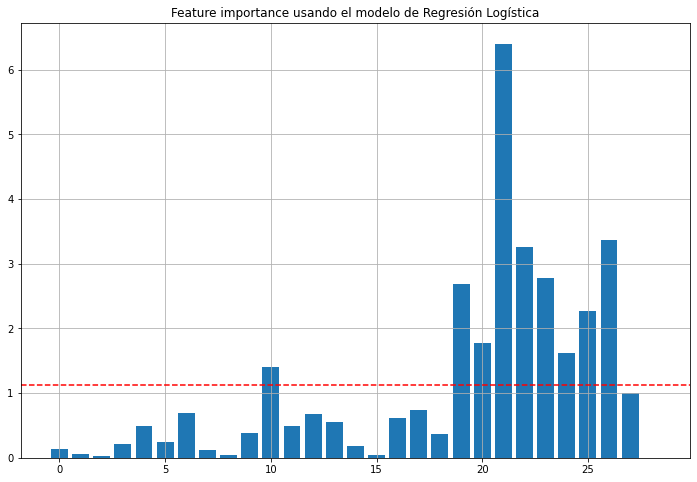

In [16]:
fig, axs = plt.subplots(figsize=(12, 8))
imp = model_lr.coef_[0]
plt.bar([x for x in range(len(imp))], np.abs(imp))
plt.title('Feature importance usando el modelo de Regresión Logística')
plt.axhline(y=np.mean(np.abs(imp)), color='red', linestyle='dashed')
plt.grid()
plt.show()

Se tomará la media de todas las variables importantes y serán tomadas aquellas que sean mayores a este valor. Sin embargo, como existen pesos negativos será tomado el valor más alto de la media pero usando el valor absoluto

In [17]:
col_list = X.columns
list_col = []
for index, value in enumerate(imp):
    if np.abs(value) >= np.mean(np.abs(imp)):
        list_col.append(col_list[index])

Con esta variables iremos a realizar la primera parte de la experimentación

## **Partición de los datos**

In [18]:
X_init = X[list_col]
X_train, X_test, y_train, y_test = train_test_split(X_init, y, test_size=0.3, random_state=15)

## **Modelamiento**

In [19]:
def ML_mol(x_train, y_train, parameters, ML_model=None, metric=None):
    
    ''' Función para la evaluación de modelos mediante la aplicación de GridSerachCV que permite la combinación de hiperparámetros y cross-validation:'''

    pipe = Pipeline(steps=[('x_transform', MinMaxScaler(feature_range=(1,2))), ('ML_model', ML_model)])
    # pipe = Pipeline(steps=[('ML_model', ML_model)])

    ##Entrenamiento del modelo con combinaciones de hiperparámetros
    gridt = GridSearchCV(estimator=pipe, param_grid=parameters, cv=KFold(n_splits=5), return_train_score=True, verbose=1, n_jobs=-1, scoring=metric)
    gridt.fit(x_train, y_train)

    ## Mejor puntuación (score) para las diferentes cross-validation realizadas
    score = gridt.best_score_ 
    print("Score = ", round(score, 3))
    return gridt

### ***Decision Tree***

In [20]:
clf_dt = DecisionTreeClassifier()
parameters = {'ML_model__ccp_alpha':[0.01, 0.1, 0.5], 
              'ML_model__criterion': ['gini', 'entropy'], 
              'ML_model__max_depth':[2, 4, 6, 8, 10, 12], 
              'ML_model__min_samples_split':[2, 4, 6],
              'ML_model__class_weight': ['balanced', None]}
model_grid_dt = ML_mol(X_train, np.ravel(y_train), parameters, ML_model=clf_dt, metric='accuracy')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Score =  0.998


In [21]:
model_grid_dt.best_estimator_

Pipeline(steps=[('x_transform', MinMaxScaler(feature_range=(1, 2))),
                ('ML_model',
                 DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced',
                                        criterion='entropy', max_depth=4))])

In [22]:
def conf_matrix(y_test, X_test, model=None, name='Decision Tree'):
    
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(14,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}', fontsize=16)
    plt.ylabel('Valore - Reales')
    plt.xlabel('Valores - Predicción')
    plt.show()
    
    return pred

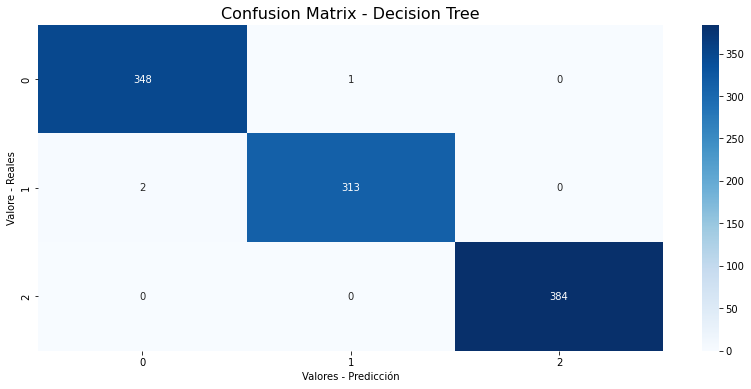

In [23]:
pred = conf_matrix(y_test, X_test, model=model_grid_dt, name='Decision Tree')

In [24]:
acc = accuracy_score(y_test, pred)
print(f'El accuracy para el modelo DecisionTree es: {round(acc,3)}')

El accuracy para el modelo DecisionTree es: 0.997


In [27]:
names_semaforo = ['Amarillo', 'Rojo', 'Verde']
print(classification_report(y_test, pred, target_names=names_semaforo))

              precision    recall  f1-score   support

    Amarillo       0.99      1.00      1.00       349
        Rojo       1.00      0.99      1.00       315
       Verde       1.00      1.00      1.00       384

    accuracy                           1.00      1048
   macro avg       1.00      1.00      1.00      1048
weighted avg       1.00      1.00      1.00      1048



#### **Conclusiones** 

* Se observa que durante el entrenamiento se tiene un `accuracy` de 0.998 bastante bueno y con el conjunto de test de 0.997. Bastante bueno considerando que se tiene clases balanceadas
* Dentro de la matriz de confusión para la clase `Amarillo` el modelo solo se equivicó una vez, para la clase `Rojo` dos veces, diferente a la clase `Verde` no tuvo ninguna equivocación. Esto también lo podemos corroborar con el reporte de clasificación mostrando valores altos de precision, recall, f1-score.

### ***Random Forest***

In [28]:
clf_rf = RandomForestClassifier()
parameters = {'ML_model__ccp_alpha':[0, 0.1, 1, 10], 
              'ML_model__criterion': ['gini', 'entropy','log_loss'], 
              'ML_model__max_depth':[2, 4, 6, 8, 10], 
              'ML_model__min_samples_split':[2, 4],
              'ML_model__class_weight': ['balanced', None],
              'ML_model__n_estimators': [10, 50, 100]}
model_grid_rf = ML_mol(X_train, np.ravel(y_train), parameters, ML_model=clf_rf, metric='accuracy')

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Score =  0.999


In [29]:
model_grid_rf.best_estimator_

Pipeline(steps=[('x_transform', MinMaxScaler(feature_range=(1, 2))),
                ('ML_model',
                 RandomForestClassifier(ccp_alpha=0, class_weight='balanced',
                                        max_depth=8))])

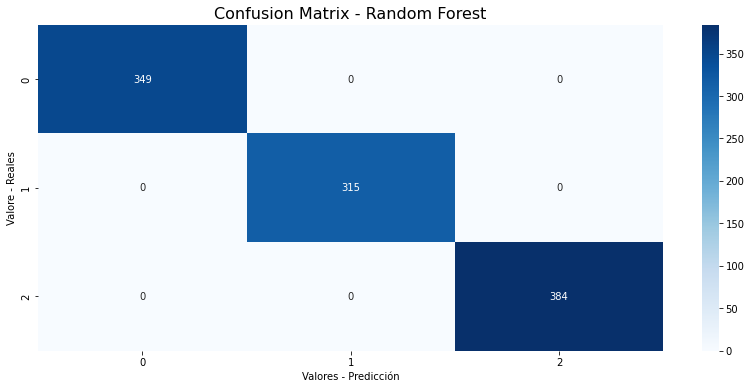

In [30]:
pred_rf = conf_matrix(y_test, X_test, model=model_grid_rf, name='Random Forest')

In [31]:
acc_rf = accuracy_score(y_test, pred_rf)
print(f'El accuracy para el modelo RandomForest es: {round(acc_rf,3)}')

El accuracy para el modelo RandomForest es: 1.0


In [32]:
print(classification_report(y_test, pred_rf, target_names=names_semaforo))

              precision    recall  f1-score   support

    Amarillo       1.00      1.00      1.00       349
        Rojo       1.00      1.00      1.00       315
       Verde       1.00      1.00      1.00       384

    accuracy                           1.00      1048
   macro avg       1.00      1.00      1.00      1048
weighted avg       1.00      1.00      1.00      1048



#### **Conclusiones**

* Se observa que para Random Forest se tiene un métrica casi que perfecta y dentro de la matriz de confusión con el conjunto de datos de testeo, este no se equivoca. A simple vista se podría considerar como un bueno modelo. Sin embargo, sería importante poder realizar algunos gráficos de validación viendo como el tamaño del conjunto de datos como los diferentes hiperparámetros pueden estar generando que el modelo tenga una predicción de este tipo.
* Las métricas del classification_report corroboran los resultados obtenidos

## **Cálculo de las curvas precision-recall usando RandomForest**

In [34]:
classes = len(set(y))
y_bin = label_binarize(y, classes=[*range(classes)])

### **Partición de datos - Modelo Random Forest**

In [35]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_init, y_bin, test_size=0.3, random_state=15)

In [36]:
clf_rf_bin = RandomForestClassifier()
parameters_bin = {'ML_model__ccp_alpha':[0, 0.1, 1, 10], 
              'ML_model__criterion': ['gini', 'entropy','log_loss'], 
              'ML_model__max_depth':[2, 4, 6, 8, 10], 
              'ML_model__min_samples_split':[2, 4],
              'ML_model__class_weight': ['balanced', None],
              'ML_model__n_estimators': [10, 50, 100]}
model_grid_rf_bin = ML_mol(X_train_bin, y_train_bin, parameters_bin, ML_model=clf_rf_bin, metric='accuracy')

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Score =  0.999


In [37]:
model_grid_rf_bin.best_estimator_

Pipeline(steps=[('x_transform', MinMaxScaler(feature_range=(1, 2))),
                ('ML_model',
                 RandomForestClassifier(ccp_alpha=0, class_weight='balanced',
                                        max_depth=8, min_samples_split=4,
                                        n_estimators=10))])

In [42]:
def func_recall_roc(X_test, y_test, n_class, model=None):
    
    y_score = model.predict_proba(X_test)
    fig, axs = plt.subplots(1, 2, figsize=(25,6))
    
    ## PRECISION - RECALL CURVE
    ## ===========================================
    precision, recall = {}, {}
    for i in range(n_class):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[i][:, 1])
        axs[0].plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
    axs[0].set_xlabel("Recall", fontsize=14)
    axs[0].set_ylabel("Precision", fontsize=14)
    axs[0].legend(loc='best')
    axs[0].set_title('PRECISION Vs RECALL', fontsize=16)
    
    ## ROC - CURVE
    ## ==========================================
    fpr, tpr = {}, {}
    for val in range(n_class):
        fpr[val], tpr[val], _ = roc_curve(y_test[:, val], y_score[val][:, 1].reshape(-1,1))
        axs[1].plot(fpr[val], tpr[val], lw=2, label='class {}'.format(val))
    
    axs[1].set_xlabel("Tasa Falsos Positivos", fontsize=14)
    axs[1].set_ylabel("Tasa Verdaderos Positivos", fontsize=14)
    axs[1].legend(loc='best')
    axs[1].set_title('CURVA ROC', fontsize=16)

    plt.show()
    

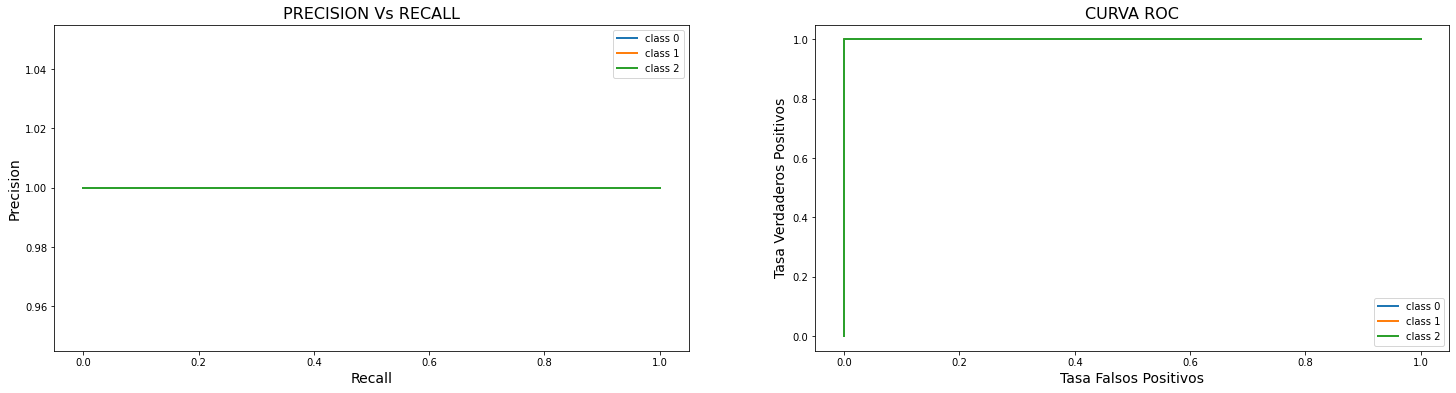

In [43]:
func_recall_roc(X_test_bin, y_test_bin, n_class=classes, model=model_grid_rf_bin)

#### **Conclusiones**

* En el cálculo de la curva precisión Vs recall para el modelo `RandomForest`, claramente vemos la exactitud tan alta que tiene este para predecir con nuevos datos. Sería interesante poder tener un conjunto bastante heterogeneo que permita poder ver si su comportamiento cambia
* Para el caos de la Curva-ROC, vemos que hace una línea vertical y luego horizontal, esto sucede para modelos "perfecto" pero que deben ser analizados con más profundidad.
* Es importante mencionar que la clase 0 pertenece al color `Amarillo`, la clase 1 al color `Rojo` y la clase 2 al color `Verde`

# **Modelamiento usando los datos descritos inicialmente (not feature importance)**

A continación se muestra la evaluación considenrando todos los datos inicialmente mencionados y compararemos con resultados usando las variables del `feature importante`

## **Partición de los datos**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

## **Modelamiento**

### ***Decision Tree***

In [46]:
clf_dt_full = DecisionTreeClassifier()
parameters = {'ML_model__ccp_alpha':[0.01, 0.1, 0.5], 
              'ML_model__criterion': ['gini', 'entropy'], 
              'ML_model__max_depth':[2, 4, 6, 8, 10, 12], 
              'ML_model__min_samples_split':[2, 4, 6],
              'ML_model__class_weight': ['balanced', None]}
model_grid_dt_full = ML_mol(X_train, np.ravel(y_train), parameters, ML_model=clf_dt_full, metric='accuracy')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Score =  0.998


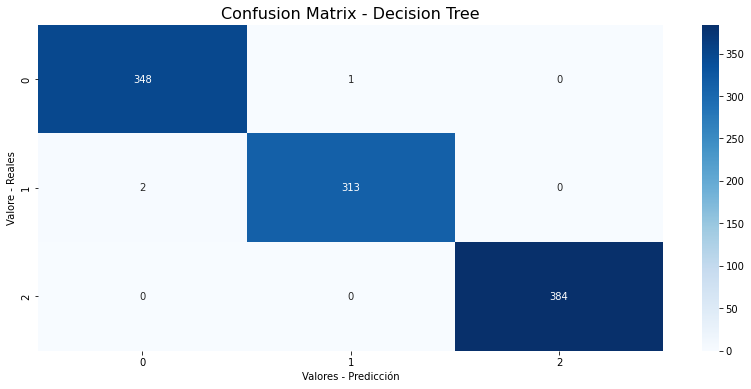

In [47]:
pred_full = conf_matrix(y_test, X_test, model=model_grid_dt_full, name='Decision Tree')

In [48]:
acc_full = accuracy_score(y_test, pred_full)
print(f'El accuracy para el modelo DecisionTree es: {round(acc_full,3)}')

El accuracy para el modelo DecisionTree es: 0.997


In [49]:
model_grid_dt_full.best_estimator_

Pipeline(steps=[('x_transform', MinMaxScaler(feature_range=(1, 2))),
                ('ML_model',
                 DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced',
                                        criterion='entropy', max_depth=4))])

In [50]:
print(classification_report(y_test, pred_full, target_names=names_semaforo))

              precision    recall  f1-score   support

    Amarillo       0.99      1.00      1.00       349
        Rojo       1.00      0.99      1.00       315
       Verde       1.00      1.00      1.00       384

    accuracy                           1.00      1048
   macro avg       1.00      1.00      1.00      1048
weighted avg       1.00      1.00      1.00      1048



#### **Conclusiones**

* Como sucede con el caso anterior, las métricas coinciden casi que en un 99% no solo para el entrenamiento, también para el conjunto de testeo. Lo mismo se observa en el reporte de clasificación. Esto muestra que con menos o más parametros de entrada, no existen cambios significativos.

### ***Random Forest***

In [51]:
clf_rf_full = RandomForestClassifier()
parameters = {'ML_model__ccp_alpha':[0, 0.1, 1, 10], 
              'ML_model__criterion': ['gini', 'entropy','log_loss'], 
              'ML_model__max_depth':[2, 4, 6, 8, 10], 
              'ML_model__min_samples_split':[2, 4],
              'ML_model__class_weight': ['balanced', None],
              'ML_model__n_estimators': [10, 50, 100]}
model_grid_rf_full = ML_mol(X_train, np.ravel(y_train), parameters, ML_model=clf_rf_full, metric='accuracy')

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Score =  0.998


In [52]:
model_grid_rf_full.best_estimator_

Pipeline(steps=[('x_transform', MinMaxScaler(feature_range=(1, 2))),
                ('ML_model',
                 RandomForestClassifier(ccp_alpha=0, class_weight='balanced',
                                        criterion='entropy', max_depth=8))])

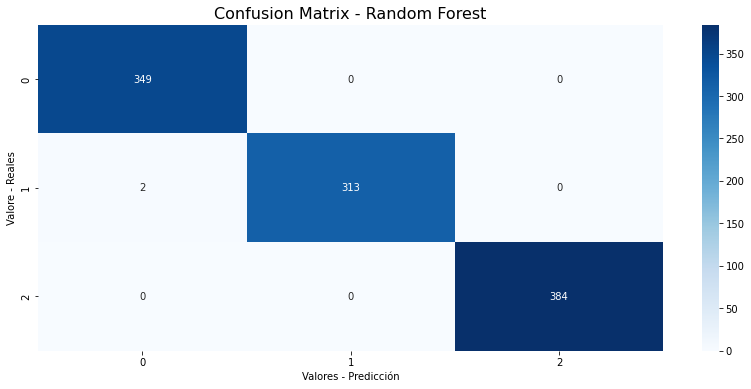

In [53]:
pred_rf_full = conf_matrix(y_test, X_test, model=model_grid_rf_full, name='Random Forest')

In [54]:
acc_rf_full = accuracy_score(y_test, pred_rf_full)
print(f'El accuracy para el modelo RandomForest es: {round(acc_rf_full,3)}')

El accuracy para el modelo RandomForest es: 0.998


In [55]:
print(classification_report(y_test, pred_rf_full, target_names=names_semaforo))

              precision    recall  f1-score   support

    Amarillo       0.99      1.00      1.00       349
        Rojo       1.00      0.99      1.00       315
       Verde       1.00      1.00      1.00       384

    accuracy                           1.00      1048
   macro avg       1.00      1.00      1.00      1048
weighted avg       1.00      1.00      1.00      1048



#### **Conclusiones**

* A diferencia del `RandomForest` aplicado a solo las variables seleccionadas por importancia de características, estas si muestran una desviación aunque muy mínima, ya que el modelo sigue teniendo un redimiento del 99.8% de precisión.

## **Cálculo de las curvas precision-recall usando RandomForest -- DATOS FULL**

In [57]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.25, random_state=15)

In [58]:
clf_rf_bin = RandomForestClassifier()
parameters_bin = {'ML_model__ccp_alpha':[0, 0.1, 1, 10], 
              'ML_model__criterion': ['gini', 'entropy','log_loss'], 
              'ML_model__max_depth':[2, 4, 6, 8, 10], 
              'ML_model__min_samples_split':[2, 4],
              'ML_model__class_weight': ['balanced', None],
              'ML_model__n_estimators': [10, 50, 100]}
model_grid_rf_bin = ML_mol(X_train_bin, y_train_bin, parameters_bin, ML_model=clf_rf_bin, metric='accuracy')

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Score =  0.998


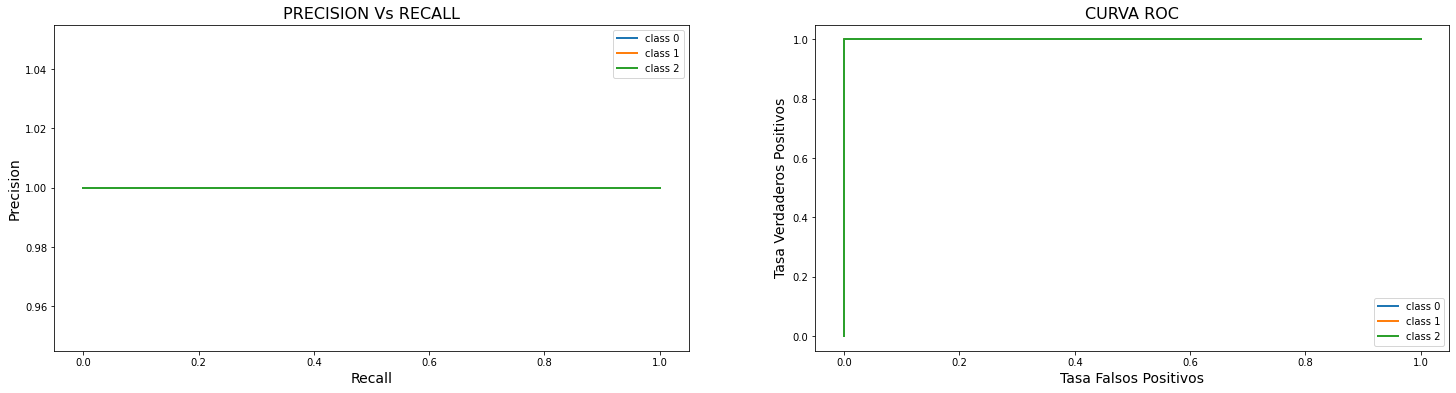

In [59]:
func_recall_roc(X_test_bin, y_test_bin, n_class=classes, model=model_grid_rf_bin)

### **Conclusiones**

* Usando regresión logística se tiene una primera iteración para seleccionar las variables más importante y con estas poder entrenar los métodos `Decision Tree` y `Random Forest`. De las 42 parámetros inicialmente seleccionados, con `Feature_importance` quedan en total 9.
* Dos iteraciones fueron desarrolladas, una con todas las 42 variables seleccionadas y el otro con solo las 9 obtenidas como importantes a partir de la regresión logística.
* Para el método `Decision tree`, los resultados coinciden tanto para full variables y las 9 más importantes. Las desvicaciones en el `accuracy` como para las equivocaciones en la matriz fueron identicas.
* El método `Random Forest` mostró mejores resultados para el caso de las variables seleccionadas como más importante. Sin embargo, cabe mencionar que las diferencias son pequeñas y el modelo con las full varibles también obtiene buenos resultados.
* Comparando los dos modelos, tenemos que el método `Random Forest` tuvo los mejores resultados y por esto para el cálculo de los gráfico de `Precision Vs Recall` como `Curva ROC`, es usado este modelo.
* Debido a tan alta precisión obtenida, sería importante poder realizar curvas de validación para verificar como el tamaño del conjunto de datos, como las variaciones de los hiperparámetros afectan el desarrollo de este.